## https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/

In [1]:
from os import path
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from keras import backend as K
from keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from keras import optimizers
import matplotlib.pyplot as plt 
import numpy as np 


In [2]:
from tensorflow.keras.applications import vgg16

# Init the VGG model 
vgg_conv = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(244, 244, 3))

In [3]:
# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x0000019BAA89C490> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000019BB3439820> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000019BB3439FD0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000019BB34591F0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000019BB34C6520> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000019BB34CE9A0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000019BB34592E0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000019BB34DDA00> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000019BB44B3A60> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000019BB44B3FA0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000019BB34D3370> False
<tensorflow.python.

In [4]:
# Create the model
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 43)                44075     
Total params: 40,449,899
Trainable params: 25,735,211
Non-trainable params: 14,714,688
_________________________________________________________________


In [7]:
train = "E:/TrafficSigns/Train"
#validation = "F:/TrafficSigns/Validate1"

## https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator

In [8]:
# Load the normalized images
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2) # set validation split
#validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10


image_size = 244 


# Data generator for training data
train_generator = train_datagen.flow_from_directory(
        train,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical',
        subset="training",)

#Data generator for validation data
validation_generator = train_datagen.flow_from_directory(
        train,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False,# had this true
        subset="validation"
       )

Found 62121 images belonging to 43 classes.
Found 15529 images belonging to 43 classes.


In [9]:
# Configure the model for training
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])

# Train the model
history = model.fit(train_generator, steps_per_epoch= train_generator.samples/train_generator.batch_size,\
      epochs=10, validation_data=validation_generator, 
      validation_steps= validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/10
622/621 [==============================] - 15929s 26s/step - loss: 1.9170 - acc: 0.4877 - val_loss: 2.7743 - val_acc: 0.4313
Epoch 2/10
622/621 [==============================] - 14805s 24s/step - loss: 0.8939 - acc: 0.7146 - val_loss: 2.9279 - val_acc: 0.5020
Epoch 3/10
622/621 [==============================] - 13771s 22s/step - loss: 0.6714 - acc: 0.7846 - val_loss: 3.6519 - val_acc: 0.5297
Epoch 4/10
622/621 [==============================] - ETA: -15s - loss: 0.5546 - acc: 0.8213

KeyboardInterrupt: 

In [ ]:
model.save("signsModel.h5")

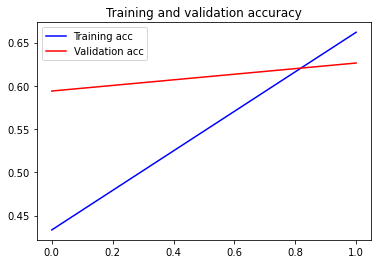

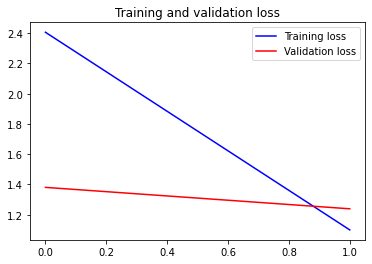

In [8]:
# only ran 1 epoch so dont have the data to graph - i think


# Utility function for plotting of the model results
def visualize_results(history):
    # Plot the accuracy and loss curves
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.savefig('signs1.svg')
    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.savefig('signs2.svg')
    plt.show()


# Run the function to illustrate accuracy and loss
visualize_results(history)

In [9]:
acc1 = history.history.keys()
acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print(acc)

[0.4334353506565094, 0.662044107913971]


In [10]:
# Utility function for obtaining of the errors 
def obtain_errors(val_generator, predictions):
    # Get the filenames from the generator
    fnames = validation_generator.filenames

    # Get the ground truth from generator
    ground_truth = validation_generator.classes

    # Get the dictionary of classes
    label2index = validation_generator.class_indices

    # Obtain the list of the classes
    idx2label = list(label2index.keys())
    print("The list of classes: ", idx2label)

    # Get the class index
    predicted_classes = np.argmax(predictions, axis=1)

    errors = np.where(predicted_classes != ground_truth)[0]
    print("Number of errors = {}/{}".format(len(errors),validation_generator.samples))
    print('error percentage =', len(errors) / validation_generator.samples )
    print ('corrct percentage =', 1 - len(errors) / validation_generator.samples)
    return idx2label, errors, fnames


# Utility function for visualization of the errors
def show_errors(idx2label, errors, predictions, fnames):
    # Show the errors
    for i in range(len(errors)):
        pred_class = np.argmax(predictions[errors[i]])
        pred_label = idx2label[pred_class]

        title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
            fnames[errors[i]].split('/')[0],
            pred_label,
            predictions[errors[i]][pred_class])

        original = tf.keras.preprocessing.image.load_img('{}/{}'.format(validation,fnames[errors[i]]))
        plt.figure(figsize=[7,7])
        plt.axis('off')
        plt.title(title)
        plt.imshow(original)
        plt.show()

In [11]:
# Get the predictions from the model using the generator
predictions = model.predict(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)

# Run the function to get the list of classes and errors
idx2label, errors, fnames = obtain_errors(validation_generator, predictions)

# Run the function to illustrate the error cases
show_errors(idx2label, errors, predictions, fnames)

785/784 [==============================] - 1502s 2s/step
The list of classes:  ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42']
Number of errors = 2929/7841
error percentage = 0.37354929218211963
corrct percentage = 0.6264507078178804


NameError: name 'validation' is not defined

In [34]:
idx2label

['0', '1']

In [35]:
len(errors)

9

In [36]:
predictions

array([[8.2799804e-01, 1.7200193e-01],
       [6.8384939e-01, 3.1615064e-01],
       [5.9874725e-01, 4.0125278e-01],
       [3.3966452e-01, 6.6033554e-01],
       [5.0766492e-01, 4.9233508e-01],
       [2.6518168e-02, 9.7348183e-01],
       [3.2183041e-03, 9.9678171e-01],
       [1.1606358e-03, 9.9883944e-01],
       [1.5798302e-02, 9.8420173e-01],
       [2.9283559e-03, 9.9707162e-01],
       [9.7777849e-01, 2.2221543e-02],
       [9.5458812e-01, 4.5411889e-02],
       [9.3497032e-01, 6.5029688e-02],
       [8.2176691e-01, 1.7823313e-01],
       [7.6297826e-01, 2.3702173e-01],
       [8.2029140e-01, 1.7970861e-01],
       [4.4328395e-01, 5.5671608e-01],
       [5.6618208e-01, 4.3381792e-01],
       [2.6626441e-01, 7.3373556e-01],
       [2.2900251e-01, 7.7099746e-01],
       [5.0259529e-05, 9.9994969e-01],
       [1.3131817e-05, 9.9998689e-01],
       [5.0245776e-06, 9.9999499e-01],
       [5.3337451e-05, 9.9994671e-01],
       [3.4409334e-06, 9.9999654e-01],
       [1.0717718e-05, 9.

In [37]:
fnames

['0\\00000_00000_00025.png',
 '0\\00000_00000_00026.png',
 '0\\00000_00000_00027.png',
 '0\\00000_00000_00028.png',
 '0\\00000_00000_00029.png',
 '0\\00000_00002_00027.png',
 '0\\00000_00002_00028.png',
 '0\\00000_00002_00029.png',
 '0\\00000_00003_00028.png',
 '0\\00000_00003_00029.png',
 '0\\00000_00004_00026.png',
 '0\\00000_00004_00027.png',
 '0\\00000_00004_00028.png',
 '0\\00000_00004_00029.png',
 '0\\00000_00005_00028.png',
 '0\\00000_00005_00029.png',
 '0\\00000_00006_00026.png',
 '0\\00000_00006_00027.png',
 '0\\00000_00006_00028.png',
 '0\\00000_00006_00029.png',
 '1\\00001_00003_00028.png',
 '1\\00001_00003_00029.png',
 '1\\00001_00006_00029.png',
 '1\\00001_00015_00029.png',
 '1\\00001_00018_00029.png',
 '1\\00001_00028_00028.png',
 '1\\00001_00028_00029.png',
 '1\\00001_00029_00028.png',
 '1\\00001_00029_00029.png',
 '1\\00001_00030_00029.png',
 '1\\00001_00032_00028.png',
 '1\\00001_00032_00029.png',
 '1\\00001_00040_00029.png',
 '1\\00001_00056_00029.png',
 '1\\00001_000

In [38]:
# Run the function to get the list of classes and errors
idx2label, errors, fnames = obtain_errors(validation_generator, predictions)

The list of classes:  ['0', '1']
Number of errors = 9/40
error percentage = 0.225
corrct percentage = 0.775


In [39]:
model.save_weights('vgg16sign74.pkl')

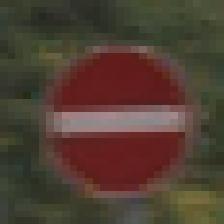

In [53]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('00031.png', target_size=(224, 224))
image

In [54]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

In [55]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [56]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

In [57]:
yhat = model.predict(image)

In [58]:
yhat1 =  model.predict(image)

In [59]:
yhat

array([[6.1358053e-28, 1.0000000e+00]], dtype=float32)

In [51]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
# Read new names from file
$newNames   = Get-Content .\file\with\new\names.txt

# Retrieve existing folders and sort by the number in their name
$oldFolders = Get-ChildItem C:\path\to\folders\ -Filter 'D_*' -Directory | Sort {$_.Name.Split('_')[1] -as [int]}

for($i = 0; $i -lt $oldFolders.Count; $i++)
{
    # Rename each folder
    Rename-Item $oldFolders[$i].FullName -NewName $newNames[$i]
}